In [62]:
pip install pyspark


Note: you may need to restart the kernel to use updated packages.


Installing the Pyspark

In [63]:
pip install findspark


Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd

In [65]:
import findspark
from pyspark import SparkContext
from pyspark.sql import SparkSession, Window, Row
from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt

Importing all necessary libraries

In [66]:
spark = SparkSession \
        .builder \
        .appName("shalini") \
        .getOrCreate()

Creating a spark session

In [67]:
df=spark.read.csv('/Users/shalinimopuri/Desktop/spark/Crimes_-_2001_to_Present\ \(1\).csv',inferSchema=True,header=True)

Loading the CSV file and reading the file

In [68]:
df

DataFrame[ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [69]:
df.show()

+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11037294|   JA371270|03/18/2015 12:00:...|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK|

In [70]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



Printing the data

# Removing all null values

In [71]:
df.count()

7918798

In [72]:
null_data = df.dropna('any')

In [73]:
null_data.count()

7214526

In [74]:
null_data.show()

+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|05/07/2020 10:24:...| 035XX S INDIANA AVE|0820|               THEFT|      $500 AND UNDER|           AP

# Changing the Date column into data type

In [75]:
null_data

DataFrame[ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [76]:
crime_data =null_data.withColumn("Date", to_date(col("Date"), "MM/dd/yyyy hh:mm:ss a"))

In [77]:
crime_data

DataFrame[ID: int, Case Number: string, Date: date, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [78]:
crime_data.show()

+--------+-----------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|      Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07| 035XX S INDIANA AVE|0820|               THEFT|      $500 AND UNDER|           APARTMENT| false|   false| 212|       2|  

# Filtering the data from the last ten years i.e., 2013-2023

In [79]:
ten_years = crime_data.filter((crime_data["Year"] >= 2013))

In [80]:
ten_years.count()

2734339

In [81]:
ten_years.show()

+--------+-----------+----------+--------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|      Date|               Block|IUCR|     Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----------+--------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07| 035XX S INDIANA AVE|0820|            THEFT|      $500 AND UNDER|           APARTMENT| false|   false| 212|       2|   3|         

# Removing the records with the following crime types

In [82]:
crime_types = ['NON-CRIMINAL (SUBJECT SPECIFIED)', 'OTHER OFFENSE', 'STALKING', 'NON - CRIMINAL', 'ARSON']
df2 = ten_years.filter(~col("Primary Type").isin(crime_types))
df2.show()

+--------+-----------+----------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|      Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07| 035XX S INDIANA AVE|0820|              THEFT|      $500 AND UNDER|           APARTMENT| false|   false| 212|       2|   3| 

In [83]:
display(df2)

DataFrame[ID: int, Case Number: string, Date: date, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [84]:
c=df2.select("Primary Type").distinct()
c.show(100)

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|           RITUALISM|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|        NON-CRIMINAL|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|OTHER NARCOTIC VI...|
|INTERFERENCE WITH...|
+--------------------+



displaying the distinct values of the Primary Type column

# Merging the similar Crime Types

In [85]:
from pyspark.sql.functions import when

merged_crime_types = when(df2["Primary Type"].isin('SEX OFFENSE', 'PROSTITUTION'), 'SEX OFFENSE/PROSTITUTION').otherwise(df2["Primary Type"])
df3 = df2.withColumn("Primary Type", merged_crime_types)

merged_crime_type1 = when(df3["Primary Type"].isin('UNLAWFUL ENTRY', 'FORCIBLE ENTRY'), 'FORCE ENTRY').otherwise(df3["Primary Type"])
df4 = df3.withColumn("Primary Type", merged_crime_type1)

merged_crime_type2 = when(df4["Primary Type"].isin('THEFT', 'ROBBERY','RETAIL THEFT','MOTOR VEHICLE THEFT','BURGLARY'), 'THEFT').otherwise(df4["Primary Type"])
df5 = df4.withColumn("Primary Type", merged_crime_type2)

merged_crime_type3 = when(df5["Primary Type"].isin('PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION'), 'PUBLIC VIOLATION').otherwise(df5["Primary Type"])
df6 = df5.withColumn("Primary Type", merged_crime_type3)

merged_crime_type4 = when(df6["Primary Type"].isin('BATTERY', 'ASSAULT'), 'ASSAULT').otherwise(df6["Primary Type"])
df7 = df6.withColumn("Primary Type", merged_crime_type4)


df7.show()

+--------+-----------+----------+--------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|      Date|               Block|IUCR|     Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----------+--------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12045583|   JD226426|2020-05-07| 035XX S INDIANA AVE|0820|            THEFT|      $500 AND UNDER|           APARTMENT| false|   false| 212|       2|   3|         

In [86]:
x=df7.select('Primary Type').distinct()
x.show()

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|    PUBLIC VIOLATION|
|           OBSCENITY|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
|               THEFT|
|SEX OFFENSE/PROST...|
|            HOMICIDE|
|           RITUALISM|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|        NON-CRIMINAL|
+--------------------+
only showing top 20 rows



displaying the distinct values of the Primary Type column in the merged crime types dataframe

In [87]:
list=[data[0] for data in x.select('Primary Type').collect()]
list

['OFFENSE INVOLVING CHILDREN',
 'CRIMINAL SEXUAL ASSAULT',
 'PUBLIC VIOLATION',
 'OBSCENITY',
 'GAMBLING',
 'CRIMINAL TRESPASS',
 'ASSAULT',
 'LIQUOR LAW VIOLATION',
 'THEFT',
 'SEX OFFENSE/PROSTITUTION',
 'HOMICIDE',
 'RITUALISM',
 'CRIM SEXUAL ASSAULT',
 'HUMAN TRAFFICKING',
 'INTIMIDATION',
 'DECEPTIVE PRACTICE',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIMINAL DAMAGE',
 'NARCOTICS',
 'NON-CRIMINAL',
 'KIDNAPPING',
 'WEAPONS VIOLATION',
 'OTHER NARCOTIC VIOLATION',
 'INTERFERENCE WITH PUBLIC OFFICER']

Listing the Primary type column in the merged crime types dataframe

# Year wise trend of the crime occured in the last ten years

In [88]:
sum1 = []

for year in range(2013, 2024):
    filtered_data = df7.filter(col('Year') == str(year))
    
    crime_counts = filtered_data.groupBy('Primary Type').count()
    
    crime_count_dict = {row['Primary Type']: row['count'] for row in crime_counts.collect()}
    max_count = 0
    trending_crime = None
    
    total_count = filtered_data.count()
    
    for crime_type in list:
        count = crime_count_dict.get(crime_type, 0)
        if count > max_count:
            max_count = count
            trending_crime = crime_type
    
    print(f"Year: {year}")
    print(f"Total No ofCrimes: {total_count}")
    print(f"Trending Crime in Chicago: {trending_crime} with {max_count} occurrences\n")
    
    sum1.append(total_count)

Year: 2013
Total No ofCrimes: 287822
Trending Crime in Chicago: THEFT with 113732 occurrences



Year: 2014
Total No ofCrimes: 256123
Trending Crime in Chicago: THEFT with 95592 occurrences



Year: 2015
Total No ofCrimes: 239889
Trending Crime in Chicago: THEFT with 89431 occurrences



Year: 2016
Total No ofCrimes: 248589
Trending Crime in Chicago: THEFT with 98532 occurrences



Year: 2017
Total No ofCrimes: 246560
Trending Crime in Chicago: THEFT with 99736 occurrences



Year: 2018
Total No ofCrimes: 245378
Trending Crime in Chicago: THEFT with 95315 occurrences



Year: 2019
Total No ofCrimes: 240849
Trending Crime in Chicago: THEFT with 88258 occurrences



Year: 2020
Total No ofCrimes: 193864
Trending Crime in Chicago: THEFT with 66511 occurrences



Year: 2021
Total No ofCrimes: 187552
Trending Crime in Chicago: THEFT with 64195 occurrences



Year: 2022
Total No ofCrimes: 217404
Trending Crime in Chicago: THEFT with 90840 occurrences



Year: 2023
Total No ofCrimes: 190540
Trending Crime in Chicago: THEFT with 81304 occurrences



In [89]:
import pandas as pd

d = {
    'year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'count': sum1
}
df = pd.DataFrame(d)
print(df)


    year   count
0   2013  287822
1   2014  256123
2   2015  239889
3   2016  248589
4   2017  246560
5   2018  245378
6   2019  240849
7   2020  193864
8   2021  187552
9   2022  217404
10  2023  190540


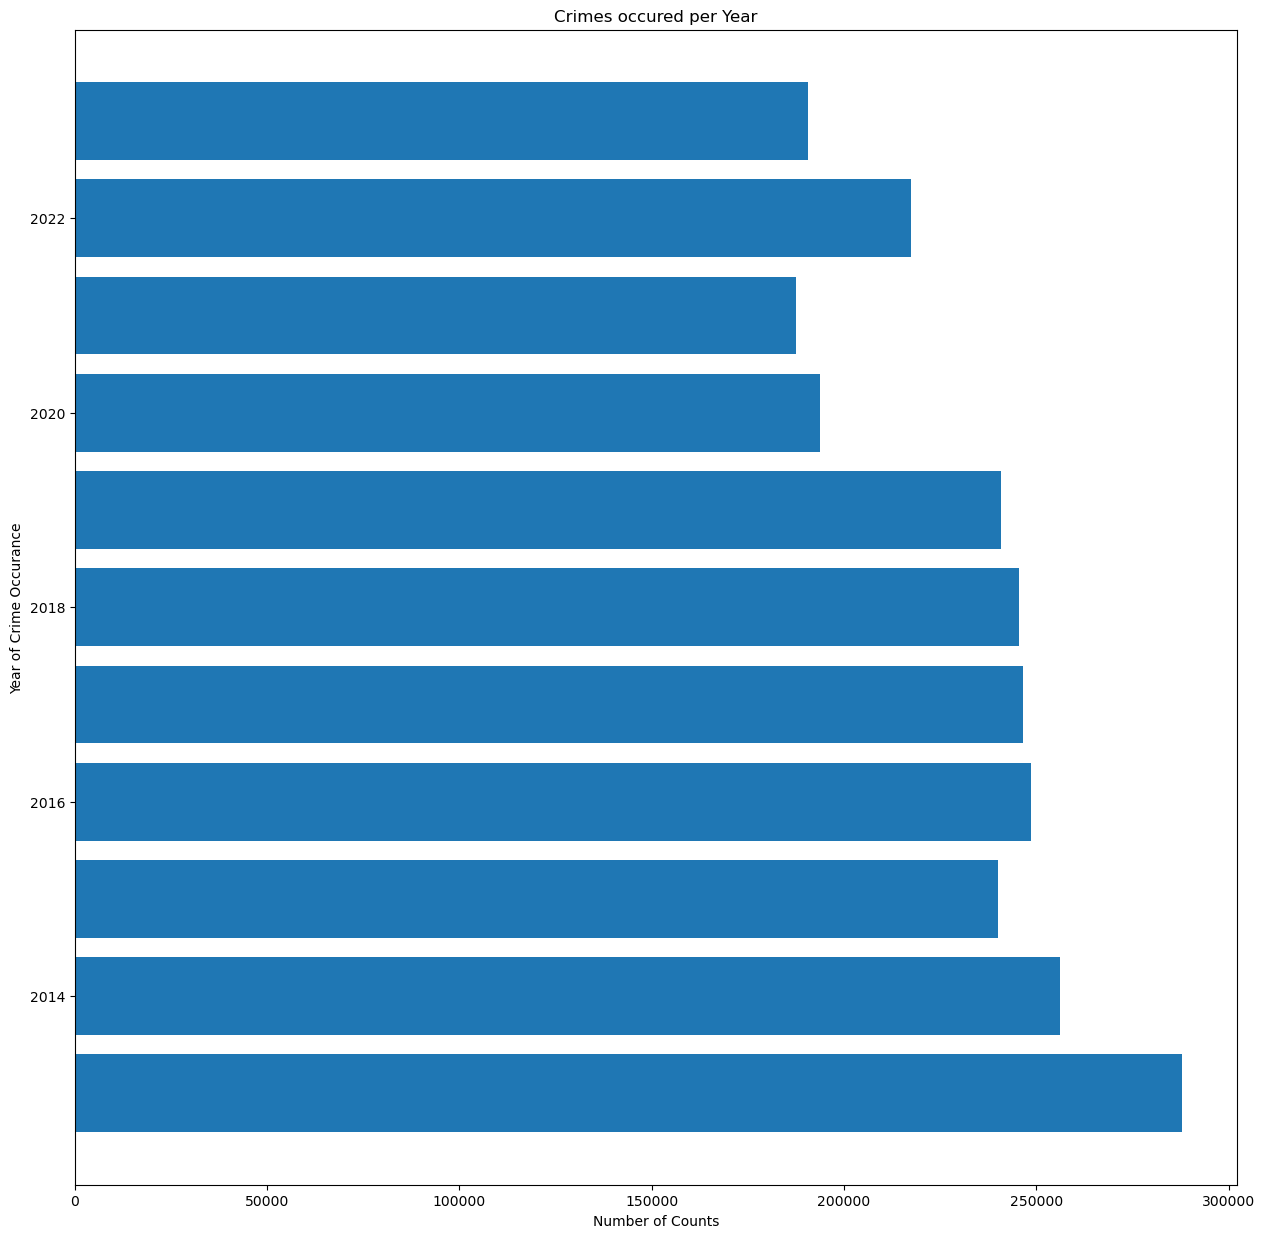

In [90]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(df['year'], df['count'])
ax.set_xlabel('Number of Counts')
ax.set_ylabel('Year of Crime Occurance')
ax.set_title('Crimes occured per Year')
plt.show()

# Finding which hour of the day crime is highest

In [93]:
from pyspark.sql.functions import hour

x= df2.groupBy(hour(df2["Date"]).alias("Hour")).count().orderBy("count", ascending=False)

y= x.first()

z = y["Hour"]
crime_count = y["count"]

print(f"The hour with the highest crime is {y} o'clock with {crime_count} crimes.")


The hour with the highest crime is Row(Hour=0, count=2554570) o'clock with 2554570 crimes.


# Top ten crimes occured in Chicago and plotting them

In [95]:
from pyspark.sql.functions import col

distinct_type = [row['Primary Type'] for row in df7.select(col('Primary Type')).distinct().collect()]

crime_count = [df7.filter(col('Primary Type') == crime_type).count() for crime_type in distinct_type]

print(crime_count)
print(distinct_type)


[22491, 6443, 17772, 542, 2081, 64247, 715807, 2732, 983446, 19598, 6765, 1, 8799, 91, 1625, 167670, 1174, 301458, 156410, 166, 1822, 62699, 58, 10673]
['OFFENSE INVOLVING CHILDREN', 'CRIMINAL SEXUAL ASSAULT', 'PUBLIC VIOLATION', 'OBSCENITY', 'GAMBLING', 'CRIMINAL TRESPASS', 'ASSAULT', 'LIQUOR LAW VIOLATION', 'THEFT', 'SEX OFFENSE/PROSTITUTION', 'HOMICIDE', 'RITUALISM', 'CRIM SEXUAL ASSAULT', 'HUMAN TRAFFICKING', 'INTIMIDATION', 'DECEPTIVE PRACTICE', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE', 'NARCOTICS', 'NON-CRIMINAL', 'KIDNAPPING', 'WEAPONS VIOLATION', 'OTHER NARCOTIC VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER']


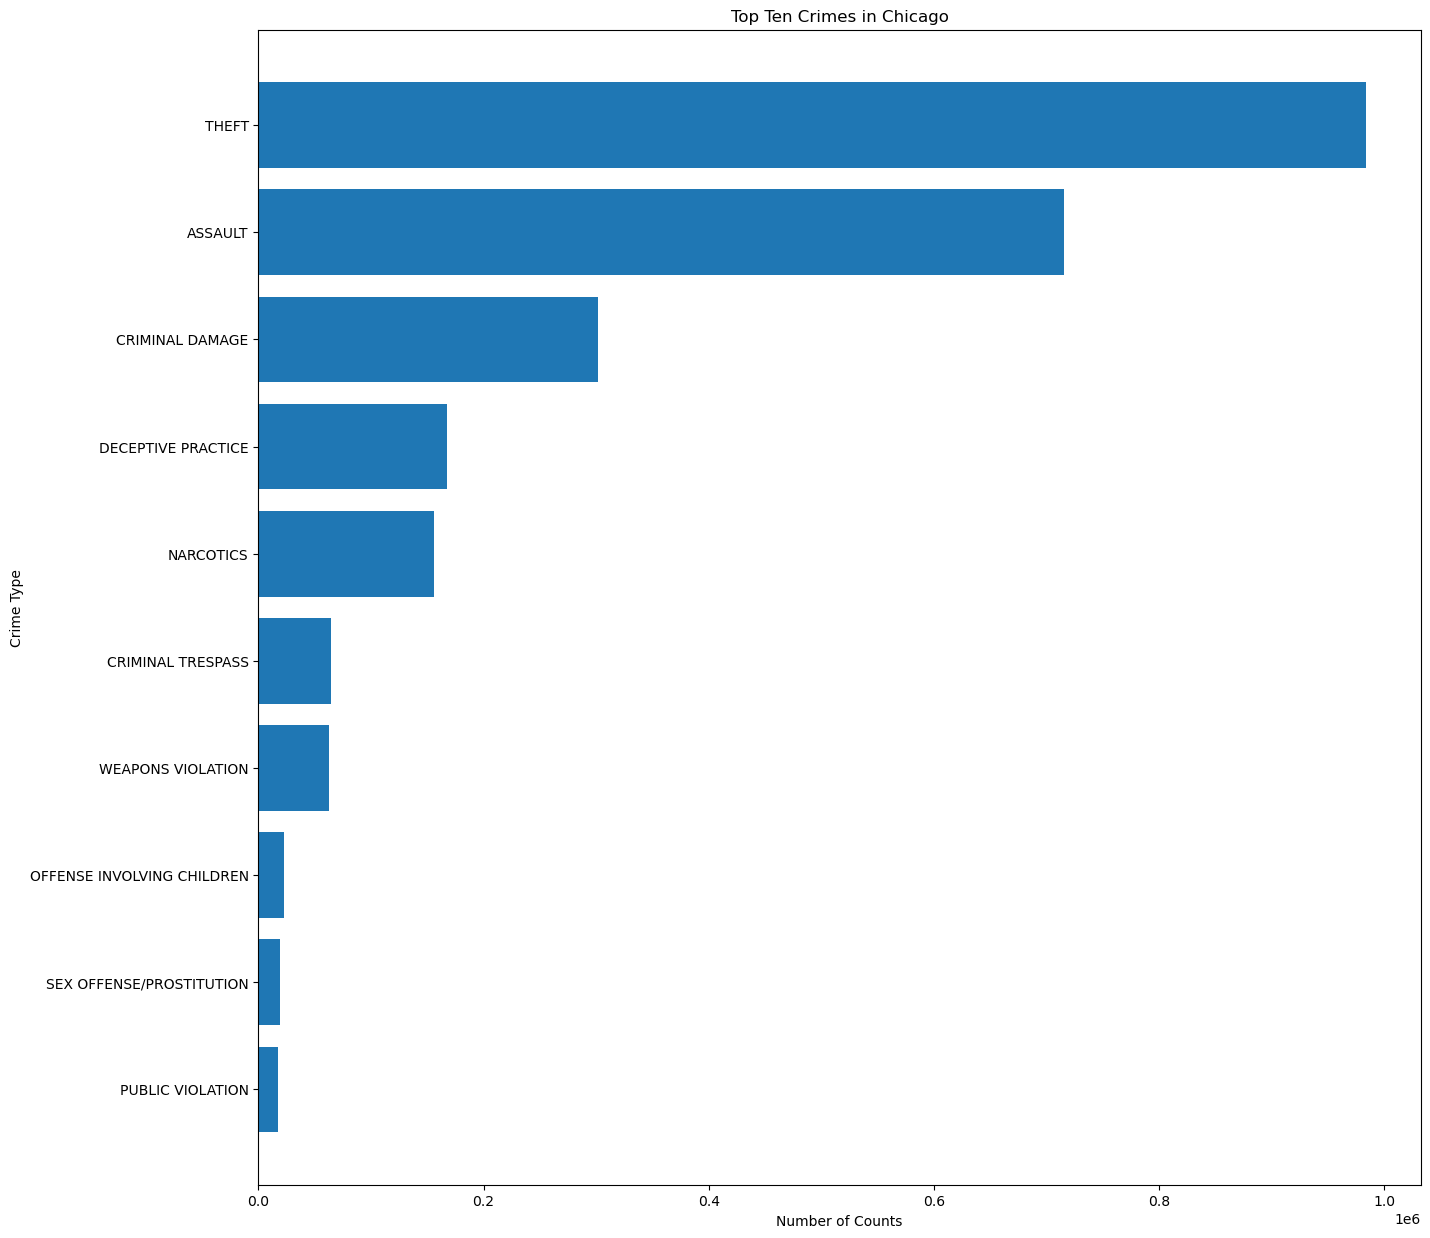

In [96]:
data={
    'crimename':distinct_type,
    'count':crime_count
}
df = pd.DataFrame(data)

top_crimes = df.nlargest(10, 'count')
plt.figure(figsize=(15, 15))
plt.barh(top_crimes['crimename'], top_crimes['count'])
plt.xlabel('Number of Counts')
plt.ylabel('Crime Type')
plt.title('Top Ten Crimes in Chicago')
plt.gca().invert_yaxis()
plt.show()